Upload data 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


Library Loading

In [4]:
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
y = df['label']
X = df.drop(labels=['label'], axis=1)

X_train = X / 255.0
X_train = X.values.reshape(-1, 28, 28, 1)
y_train = to_categorical(y, num_classes=10)

In [7]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95**x, verbose=0)
styles = [':', '-.', '--', '-', ':', '-.', '--', '-', ':', '-.', '--', '-']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (37800, 28, 28, 1)
X_test shape: (4200, 28, 28, 1)
y_train shape: (37800, 10)
y_test shape: (4200, 10)


In [9]:
def plot_history(names, history):
  plt.figure(figsize=(15, 5))

  for i in range(nets):
    plt.plot(history[i].history['val_accuracy'], linestyle=styles[i])

  plt.title('Model Image Processing Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Apoch')
  plt.legend(names, loc='upper left')
  axes = plt.gca()
  axes.set_ylim([0.98, 1])
  plt.show()

### Convolution Neural Network Experiment

1. Number of Convolution and Pooling layer

In [ ]:
nets = 3
model = [0] * nets

for i in range(3):
  model[i] = Sequential()

  model[i].add(Conv2D(24, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)))
  model[i].add(MaxPool2D())

  if i > 0:
    model[i].add(Conv2D(48, kernel_size=5, padding='same', activation='relu'))
    model[i].add(MaxPool2D())

  if i > 1:
    model[i].add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
    model[i].add(MaxPool2D(padding='same'))

  model[i].add(Flatten())
  model[i].add(Dense(256, activation='relu'))
  model[i].add(Dense(10, activation='softmax'))
  model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = [0] * nets
names = ['(C-P) x 1', '(C-P) x 2', '(C-P) x 3']
epochs = 20

for i in range(nets):
  history[i] = model[i].fit(X_train, y_train, batch_size=80, epochs=epochs, validation_data=(X_test, y_test), callbacks=[annealer], verbose=0)
  print(f'CNN {names[i]}: \nEpochs: {epochs}, History: {history[i]}')

CNN (C-P) x 1: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87f46f9810>
CNN (C-P) x 2: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87f5cc4650>
CNN (C-P) x 3: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87f4594690>


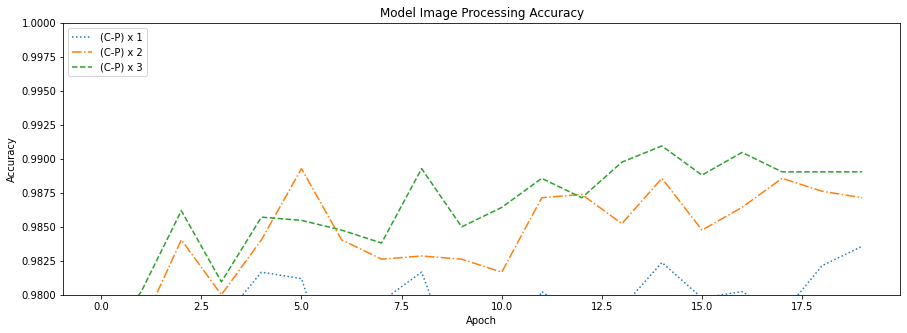

In [ ]:
plot_history(names, history)

2. Number of Neurons within a Convolution Layer

In [ ]:
nets = 6
model = [0] * nets

for i in range(nets):
  model[i] = Sequential()

  model[i].add(Conv2D(i * 8 + 8, kernel_size=5, activation='relu', input_shape=(28, 28, 1)))
  model[i].add(MaxPool2D())

  model[i].add(Conv2D(i * 16 + 16, kernel_size=5, activation='relu'))
  model[i].add(MaxPool2D())

  model[i].add(Flatten())
  model[i].add(Dense(256, activation='relu'))
  model[i].add(Dense(10, activation='softmax'))
  model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = [0] * nets
names = ['8 maps', '16 maps', '24 maps', '32 maps', '48 maps', '64 maps']
epochs = 20

for i in range(nets):
  history[i] = model[i].fit(X_train, y_train, batch_size=80, epochs=epochs, validation_data=(X_test, y_test), callbacks=[annealer], verbose=0)
  print(f'CNN {names[i]}: \nEpochs: {epochs}, History: {history[i]}')

CNN 8 maps: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87e9dcf810>
CNN 16 maps: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87ea5b8090>
CNN 24 maps: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87ead12790>
CNN 32 maps: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87eab4a810>
CNN 48 maps: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87ea96c590>
CNN 64 maps: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87ea7f7f10>


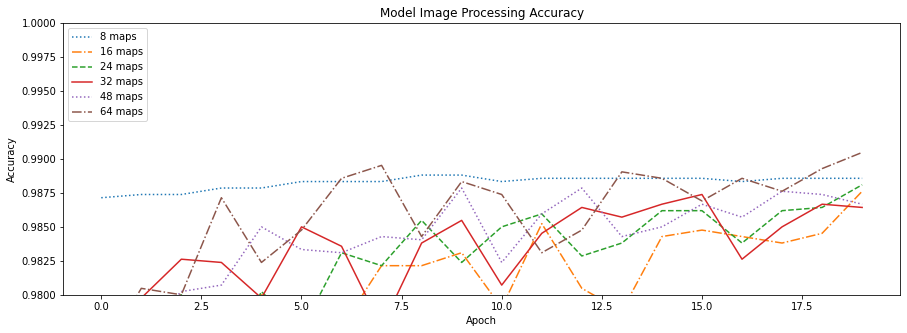

In [ ]:
plot_history(names, history)

3. Number of neurons in Dense Layer

In [ ]:
nets = 6
model = [0] * nets

for i in range(nets):
  model[i] = Sequential()

  model[i].add(Conv2D(32, kernel_size=5, activation='relu', input_shape=(28, 28, 1)))
  model[i].add(MaxPool2D())

  model[i].add(Conv2D(64, kernel_size=5, activation='relu'))
  model[i].add(MaxPool2D())
  
  model[i].add(Flatten())

  if i > 0:
    model[i].add(Dense(2**(i + 4), activation='relu'))

  model[i].add(Dense(10, activation='softmax'))
  model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = [0] * nets
names = ['0N', '32N', '64N', '128N', '256N', '512N', '1024N', '2048N']
epochs = 20

for i in range(nets):
  history[i] = model[i].fit(X_train, y_train, batch_size=80, epochs=epochs, validation_data=(X_test, y_test), callbacks=[annealer], verbose=0)
  print(f'CNN {names[i]}: \nEpochs: {epochs}, History: {history[i]}')

CNN 0N: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87f4d9ccd0>
CNN 32N: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87f4bba610>
CNN 64N: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87f4b741d0>
CNN 128N: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87f478a850>
CNN 256N: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87f5041e50>
CNN 512N: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f87f4929450>


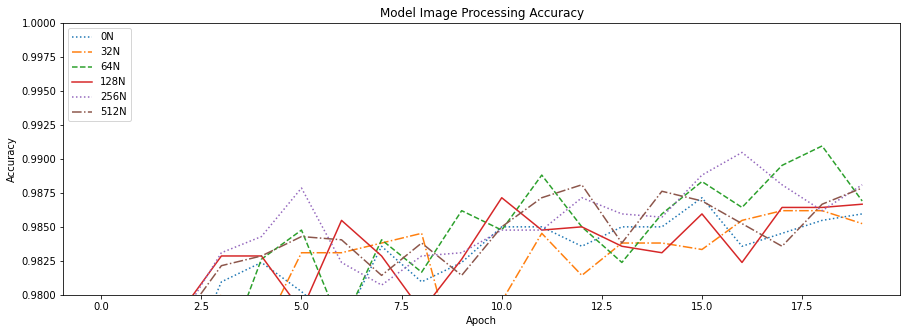

In [ ]:
plot_history(names, history)

4. Dropout rate

In [ ]:
nets = 6
model = [0] * nets

for i in range(nets):
  model[i] = Sequential()

  model[i].add(Conv2D(32, kernel_size=5, activation='relu', input_shape=(28, 28, 1)))
  model[i].add(MaxPool2D())
  model[i].add(Dropout(i * 0.1))

  model[i].add(Conv2D(64, kernel_size=5, activation='relu'))
  model[i].add(MaxPool2D())
  model[i].add(Dropout(i * 0.1))
  
  model[i].add(Flatten())
  model[i].add(Dense(128, activation='relu'))
  model[i].add(Dropout(i * 0.1))
  model[i].add(Dense(10, activation='softmax'))
  model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = [0] * nets
names = ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%']
epochs = 20

for i in range(nets):
  history[i] = model[i].fit(X_train, y_train, batch_size=80, epochs=epochs, validation_data=(X_test, y_test), callbacks=[annealer], verbose=0)
  print(f'CNN {names[i]}: \nEpochs: {epochs}, History: {history[i]}')

CNN 0%: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f52b278e390>
CNN 10%: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f52b1804ad0>
CNN 20%: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f52b17c60d0>
CNN 30%: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f52b1c71390>
CNN 40%: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f52aa5fe7d0>
CNN 50%: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f52ab4ed2d0>


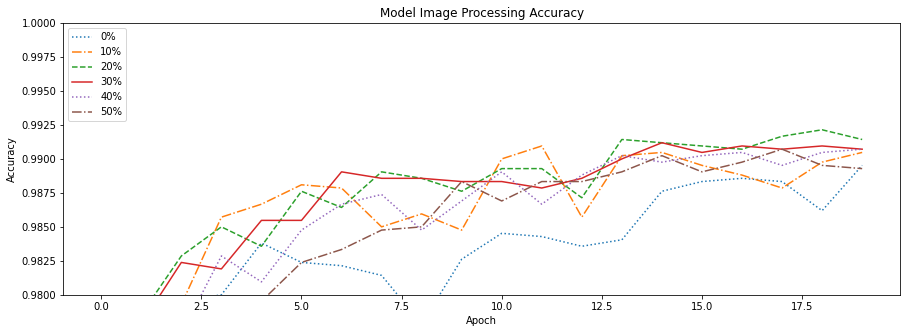

In [14]:
plot_history(names, history)

5. Advanced Features

In [15]:
nets = 5
model = [0] * nets

In [16]:
model[0] = Sequential()

model[0].add(Conv2D(32, kernel_size=5, activation='relu', input_shape=(28,28,1)))
model[0].add(MaxPool2D())
model[0].add(Dropout(0.4))

model[0].add(Conv2D(64, kernel_size=5, activation='relu'))
model[0].add(MaxPool2D())
model[0].add(Dropout(0.4))

model[0].add(Flatten())
model[0].add(Dense(128, activation='relu'))
model[0].add(Dropout(0.4))
model[0].add(Dense(10, activation='softmax'))
model[0].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model[1] = Sequential()

model[1].add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model[1].add(Conv2D(32, kernel_size=3, activation='relu'))
model[1].add(MaxPool2D())
model[1].add(Dropout(0.4))

model[1].add(Conv2D(64, kernel_size=3, activation='relu'))
model[1].add(Conv2D(64, kernel_size=3, activation='relu'))
model[1].add(MaxPool2D())
model[1].add(Dropout(0.4))

model[1].add(Flatten())
model[1].add(Dense(128, activation='relu'))
model[1].add(Dropout(0.4))
model[1].add(Dense(10, activation='softmax'))
model[1].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model[2] = Sequential()

model[2].add(Conv2D(32, kernel_size=5, activation='relu', input_shape=(28,28,1)))
model[2].add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model[2].add(Dropout(0.4))

model[2].add(Conv2D(64,kernel_size=5,activation='relu'))
model[2].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[2].add(Dropout(0.4))

model[2].add(Flatten())
model[2].add(Dense(128, activation='relu'))
model[2].add(Dropout(0.4))
model[2].add(Dense(10, activation='softmax'))
model[2].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model[3] = Sequential()

model[3].add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model[3].add(BatchNormalization())
model[3].add(Conv2D(32, kernel_size=3, activation='relu'))
model[3].add(BatchNormalization())
model[3].add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model[3].add(BatchNormalization())
model[3].add(Dropout(0.4))

model[3].add(Conv2D(64, kernel_size=3, activation='relu'))
model[3].add(BatchNormalization())
model[3].add(Conv2D(64, kernel_size=3, activation='relu'))
model[3].add(BatchNormalization())
model[3].add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model[3].add(BatchNormalization())
model[3].add(Dropout(0.4))

model[3].add(Flatten())
model[3].add(Dense(128, activation='relu'))
model[3].add(Dropout(0.4))
model[3].add(Dense(10, activation='softmax'))
model[3].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model[4] = Sequential()

model[4].add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model[4].add(BatchNormalization())
model[4].add(Conv2D(32, kernel_size=3, activation='relu'))
model[4].add(BatchNormalization())
model[4].add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model[4].add(BatchNormalization())
model[4].add(Dropout(0.4))

model[4].add(Conv2D(64, kernel_size=3, activation='relu'))
model[4].add(BatchNormalization())
model[4].add(Conv2D(64, kernel_size=3, activation='relu'))
model[4].add(BatchNormalization())
model[4].add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model[4].add(BatchNormalization())
model[4].add(Dropout(0.4))

model[4].add(Flatten())
model[4].add(Dense(128, activation='relu'))
model[4].add(BatchNormalization())
model[4].add(Dropout(0.4))
model[4].add(Dense(10, activation='softmax'))
model[4].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = [0] * nets
names = ['Basic', '32C3-32C3', '32C5S2', 'Both + BN', 'Both + BN + DA']
epochs = 20

for i in range(nets - 1):
  history[i] = model[i].fit(X_train, y_train, batch_size=80, epochs=epochs, validation_data=(X_test, y_test), callbacks=[annealer], verbose=0)
  print(f'CNN {names[i]}: \nEpochs: {epochs}, History: {history[i]}')

datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1
)

j = nets - 1
history[j] = model[j].fit_generator(datagen.flow(X_train, y_train, batch_size=64), epochs=epochs, 
                                    steps_per_epoch=X_train.shape[0]//64, validation_data=(X_test, y_test), callbacks=[annealer], verbose=0)
print(f'CNN {names[i]}: \nEpochs: {epochs}, History: {history[i]}')

CNN Basic: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f52a8b39b90>
CNN 32C3-32C3: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f52b756f910>
CNN 32C5S2: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f52b17362d0>
CNN Both + BN: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f52b1486b10>
CNN Both + BN: 
Epochs: 20, History: <keras.callbacks.History object at 0x7f52b1486b10>


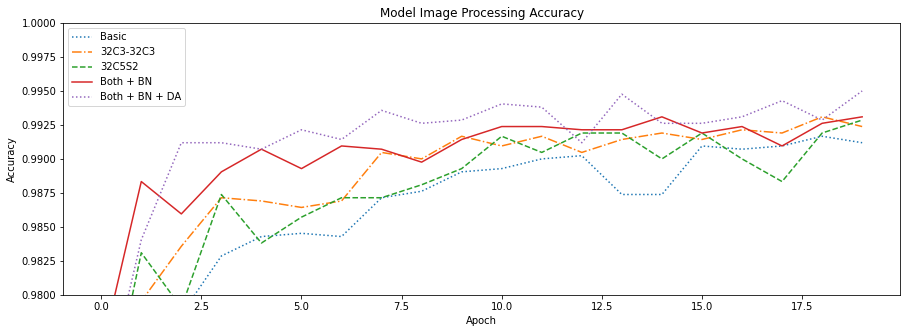

In [24]:
plot_history(names, history)